In [ ]:
!pip install fbprophet

ERROR: prophet 1.0.1 has requirement cmdstanpy==0.9.68, but you'll have cmdstanpy 0.9.5 which is incompatible.
  Found existing installation: cmdstanpy 0.9.68
    Uninstalling cmdstanpy-0.9.68:
      Successfully uninstalled cmdstanpy-0.9.68


In [ ]:
from google.colab import files
files.upload()

Saving daily-minimum-temperatures-in-mex (1).csv to daily-minimum-temperatures-in-mex (1).csv


{'daily-minimum-temperatures-in-mex (1).csv': b'Date,Daily minimum temperatures\r\n1/1/1981,20.7\r\n1/2/1981,17.9\r\n1/3/1981,18.8\r\n1/4/1981,14.6\r\n1/5/1981,15.8\r\n1/6/1981,15.8\r\n1/7/1981,15.8\r\n1/8/1981,17.4\r\n1/9/1981,21.8\r\n1/10/1981,20\r\n1/11/1981,16.2\r\n1/12/1981,13.3\r\n1/13/1981,16.7\r\n1/14/1981,21.5\r\n1/15/1981,25\r\n1/16/1981,20.7\r\n1/17/1981,20.6\r\n1/18/1981,24.8\r\n1/19/1981,17.7\r\n1/20/1981,15.5\r\n1/21/1981,18.2\r\n1/22/1981,12.1\r\n1/23/1981,14.4\r\n1/24/1981,16\r\n1/25/1981,16.5\r\n1/26/1981,18.7\r\n1/27/1981,19.4\r\n1/28/1981,17.2\r\n1/29/1981,15.5\r\n1/30/1981,15.1\r\n1/31/1981,15.4\r\n2/1/1981,15.3\r\n2/2/1981,18.8\r\n2/3/1981,21.9\r\n2/4/1981,19.9\r\n2/5/1981,16.6\r\n2/6/1981,16.8\r\n2/7/1981,14.6\r\n2/8/1981,17.1\r\n2/9/1981,25\r\n2/10/1981,15\r\n2/11/1981,13.7\r\n2/12/1981,13.9\r\n2/13/1981,18.3\r\n2/14/1981,22\r\n2/15/1981,22.1\r\n2/16/1981,21.2\r\n2/17/1981,18.4\r\n2/18/1981,16.6\r\n2/19/1981,16.1\r\n2/20/1981,15.7\r\n2/21/1981,16.6\r\n2/22/1981,1

In [ ]:
import pandas as pd
df = pd.read_csv('daily-minimum-temperatures-in-mex (1).csv')
df

,Date,Daily minimum temperatures
0,1/1/1981,20.7
1,1/2/1981,17.9
2,1/3/1981,18.8
3,1/4/1981,14.6
4,1/5/1981,15.8
...,...,...
3645,12/27/1990,14.0
3646,12/28/1990,13.6
3647,12/29/1990,13.5
3648,12/30/1990,15.7


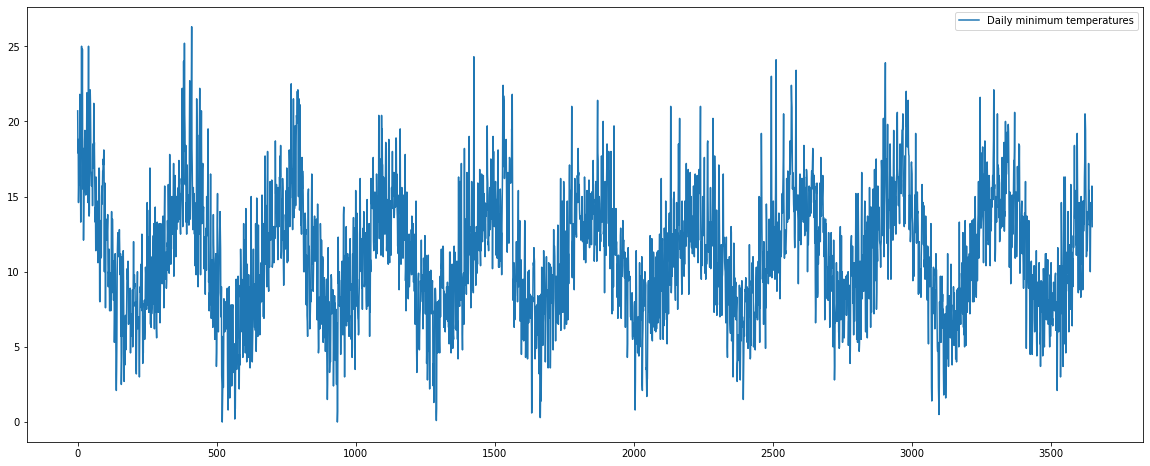

In [ ]:
from matplotlib import pyplot as plt
df[['Date','Daily minimum temperatures']].plot(figsize=(20,8))
plt.show()


In [ ]:
from pandas import to_datetime
df.columns = ['ds','y']
df['ds'] = to_datetime(df['ds'])
df.head()

,ds,y
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      3650 non-null   datetime64[ns]
 1   y       3650 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 57.2 KB


In [ ]:
from fbprophet import Prophet
model = Prophet()
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
df

,ds,y
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


In [ ]:
future_dates = model.make_future_dataframe(periods = 365)
prediction = model.predict(future_dates)
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1981-01-01,11.857441,11.539213,18.485331,11.857441,11.857441,3.328264,3.328264,3.328264,0.010955,0.010955,0.010955,3.317309,3.317309,3.317309,0.0,0.0,0.0,15.185705
1,1981-01-02,11.855608,11.680142,18.827491,11.855608,11.855608,3.375073,3.375073,3.375073,-0.019841,-0.019841,-0.019841,3.394914,3.394914,3.394914,0.0,0.0,0.0,15.230680
2,1981-01-03,11.853774,11.725735,18.971101,11.853774,11.853774,3.411907,3.411907,3.411907,-0.060133,-0.060133,-0.060133,3.472040,3.472040,3.472040,0.0,0.0,0.0,15.265682
3,1981-01-04,11.851941,11.772606,18.884429,11.851941,11.851941,3.394356,3.394356,3.394356,-0.153086,-0.153086,-0.153086,3.547443,3.547443,3.547443,0.0,0.0,0.0,15.246298
4,1981-01-05,11.850108,12.080213,18.720341,11.850108,11.850108,3.600197,3.600197,3.600197,-0.019703,-0.019703,-0.019703,3.619899,3.619899,3.619899,0.0,0.0,0.0,15.450305


In [ ]:
future_dates = model.make_future_dataframe(periods = 365)
prediction = model.predict(future_dates)
prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
4010,1991-12-27,11.588038,10.950493,17.777580,11.511499,11.678863,2.899729,2.899729,2.899729,-0.019841,-0.019841,-0.019841,2.919570,2.919570,2.919570,0.0,0.0,0.0,14.487767
4011,1991-12-28,11.588059,10.748581,17.890516,11.511143,11.679434,2.918132,2.918132,2.918132,-0.060133,-0.060133,-0.060133,2.978265,2.978265,2.978265,0.0,0.0,0.0,14.506191
4012,1991-12-29,11.588080,11.030051,17.875819,11.510811,11.680005,2.889347,2.889347,2.889347,-0.153086,-0.153086,-0.153086,3.042433,3.042433,3.042433,0.0,0.0,0.0,14.477427
4013,1991-12-30,11.588102,11.238578,18.070064,11.510492,11.680576,3.091622,3.091622,3.091622,-0.019703,-0.019703,-0.019703,3.111324,3.111324,3.111324,0.0,0.0,0.0,14.679723
4014,1991-12-31,11.588123,11.451717,18.281776,11.510173,11.681147,3.262522,3.262522,3.262522,0.078486,0.078486,0.078486,3.184036,3.184036,3.184036,0.0,0.0,0.0,14.850645


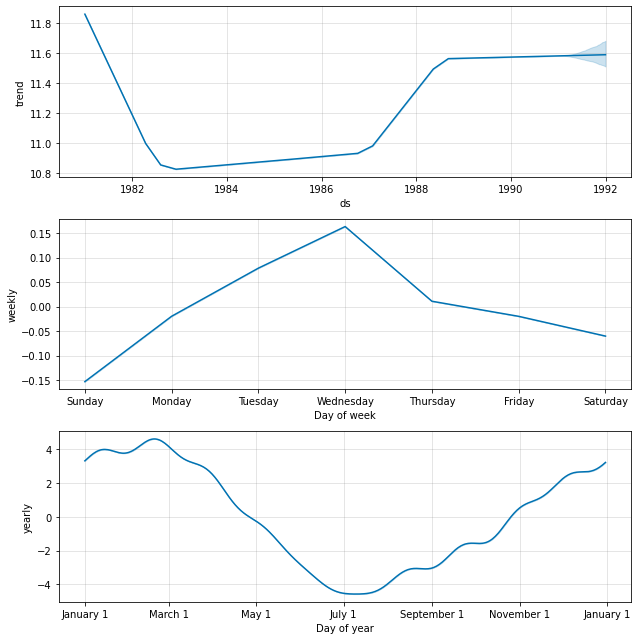

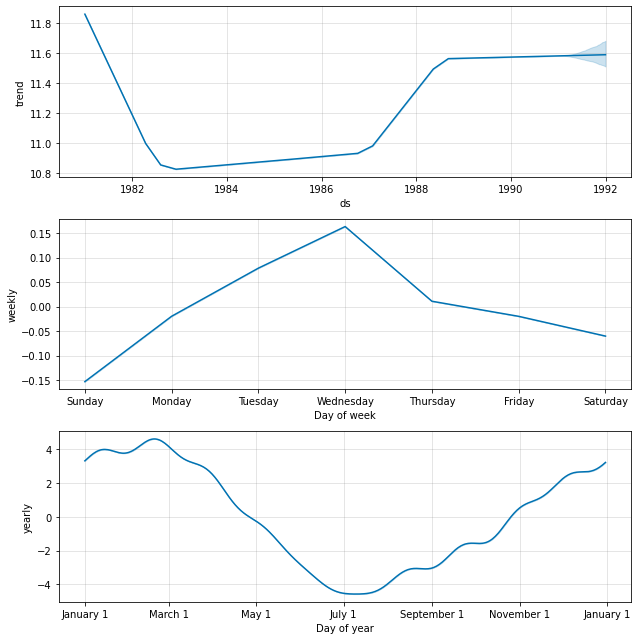

In [ ]:
model.plot_components(prediction)

In [ ]:
!pip install prophet

  Using cached https://files.pythonhosted.org/packages/08/b9/b4f0938b38dbe775c4def707f525ab816b9d0215ecd8ab2d76780f4514f8/cmdstanpy-0.9.68-py3-none-any.whl
ERROR: fbprophet 0.7.1 has requirement cmdstanpy==0.9.5, but you'll have cmdstanpy 0.9.68 which is incompatible.
  Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5


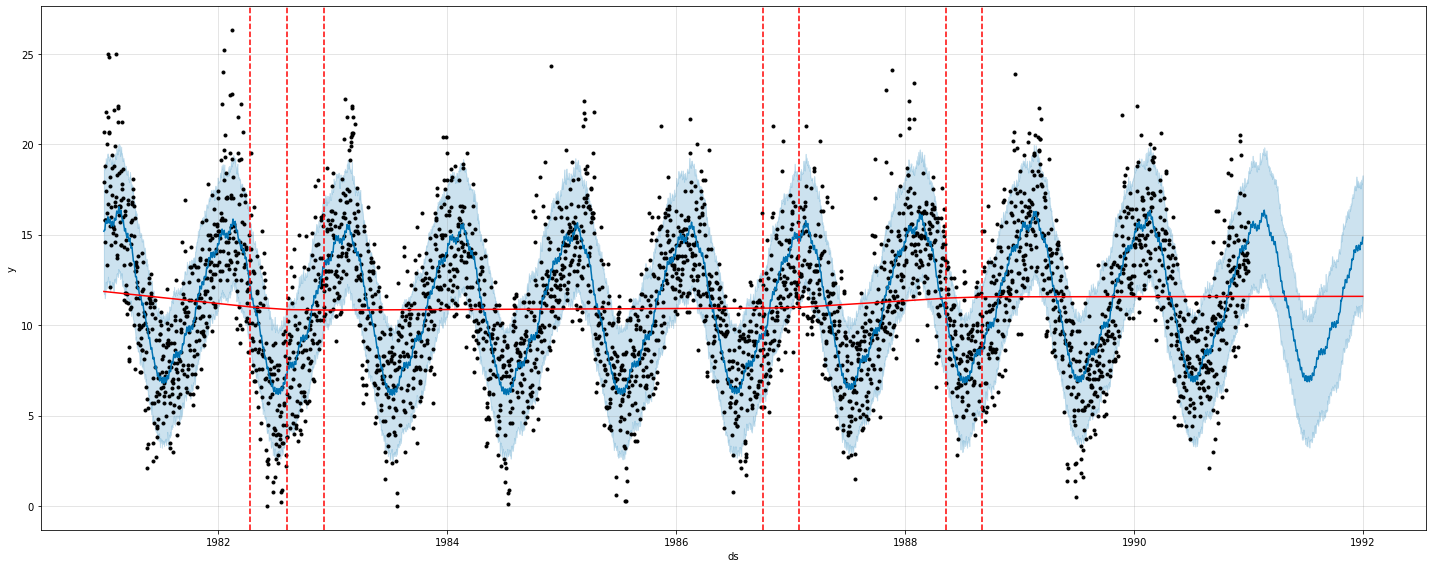

In [ ]:
from prophet.plot import add_changepoints_to_plot

fig = model.plot(prediction, figsize = (20,8))
a = add_changepoints_to_plot(fig.gca(),model,prediction)

In [ ]:
from fbprophet.diagnostics import cross_validation
cv= cross_validation(model, initial = '3285 days', period = '180 days', horizon = '365 days')
cv.head()

INFO:fbprophet:Making 1 forecasts with cutoffs between 1989-12-31 00:00:00 and 1989-12-31 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1990-01-01,14.889717,11.549593,18.310154,14.8,1989-12-31
1,1990-01-02,15.016195,11.376543,18.409053,13.3,1989-12-31
2,1990-01-03,15.092632,11.779472,18.432655,15.6,1989-12-31
3,1990-01-04,15.000724,11.595280,18.411581,14.5,1989-12-31
4,1990-01-05,15.071020,11.623990,18.786005,14.3,1989-12-31


In [ ]:
from fbprophet.diagnostics import performance_metrics

p = performance_metrics(cv)
p.tail

<bound method NDFrame.tail of      horizon       mse      rmse       mae      mape     mdape  coverage
0    36 days  5.336390  2.310063  1.683884  0.111126  0.073225  0.805556
1    37 days  5.561995  2.358388  1.760595  0.117098  0.080613  0.805556
2    38 days  5.642443  2.375383  1.780059  0.118524  0.080613  0.805556
3    39 days  5.636230  2.374075  1.771069  0.117941  0.080613  0.805556
4    40 days  5.632117  2.373208  1.766059  0.117535  0.080613  0.805556
..       ...       ...       ...       ...       ...       ...       ...
325 361 days  6.487479  2.547053  1.820185  0.132896  0.081135  0.861111
326 362 days  6.492234  2.547986  1.822869  0.132897  0.081135  0.861111
327 363 days  6.331631  2.516273  1.779291  0.128125  0.079204  0.861111
328 364 days  6.254803  2.500960  1.755855  0.125121  0.077964  0.861111
329 365 days  6.342556  2.518443  1.802708  0.128725  0.079204  0.861111

[330 rows x 7 columns]>

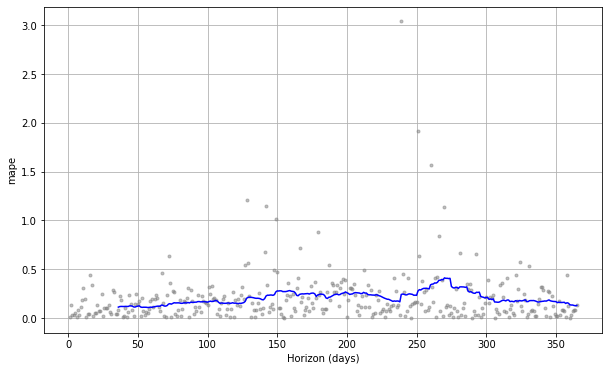

In [ ]:
from fbprophet.plot import plot_cross_validation_metric

fig = plot_cross_validation_metric(cv, metric = 'mape')